# SECTION A [BATCH 1]
# WEEK 1

# Exercise 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import math

In [2]:
df = pd.read_csv('mtcars.csv')
min_max_scaler = preprocessing.MinMaxScaler()

In [3]:
df.head(100)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [5]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [6]:
X = pd.DataFrame(df['wt'])
Y = pd.DataFrame(df['mpg'])

In [7]:
X

,wt
0,2.620
1,2.875
2,2.320
3,3.215
4,3.440
5,3.460
6,3.570
7,3.190
8,3.150
9,3.440


In [8]:
Y

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7
5,18.1
6,14.3
7,24.4
8,22.8
9,19.2


In [9]:
# X.columns = X.columns.str.strip()

In [10]:
def dummy_df(data,todummy_list):
        for x in todummy_list:
            dummies = pd.get_dummies(data[x], prefix=x,dummy_na=False)
            data = data.drop(x,1)
            data = pd.concat([data,dummies],axis=1)
        return data

In [11]:
# scaler = StandardScaler()
# robust = RobustScaler()
# x_scaled = robust.fit_transform(X)
# X = pd.DataFrame(x_scaled)
# print(x_scaled)

In [12]:
# y_scaled = robust.fit_transform(Y)
# Y = pd.DataFrame(y_scaled)
# print(Y)

In [13]:
X_train, X_test,Y_train,Y_test= train_test_split(X, Y,test_size=0.20,random_state=1)  
# Y_train = pd.DataFrame(Y_train).sort_index()
# Y_test=pd.DataFrame(Y_test).sort_index()
# X_test = X_test.sort_index()
# X_train = X_train.sort_index()

In [14]:
X_train = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T
print("Shape of X_train :", X_train.shape)
print("Shape of Y_train :", Y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (25, 2)
Shape of Y_train : (25, 1)
Shape of X_test : (7, 2)
Shape of Y_test : (7, 1)


In [17]:
def myFnLinReg(X, Y, learning_rate, iteration):
    m_test = Y.size
    m,n = X.shape
    theta = np.random.rand(n, 1)
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m_test))*np.sum(np.square(y_pred - np.array(Y)))
        d_theta = (1/m_test)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        # to print the cost for 10 times
        if(i%200 == 0):
#             print(Y)
#             print(y_pred)
            print(cost)
    
    return theta, cost_list

In [18]:
def stochastic_model(X, Y, learning_rate, iteration):
    m_test = Y.size
    m,n = X.shape
    theta = np.random.rand(n, 1)
    cost_list = []
    cost = 0
    for i in range(iteration):
        cost = 0
        for j in range(m):
            y_pred = np.dot(X[j], theta).reshape(1,1)
            cost = cost + np.square(y_pred - Y[j])
            d_theta = np.dot((y_pred - Y[j]).reshape(1,1),(X[j].reshape(2,1)).T)
            theta = theta - learning_rate*(d_theta.T)
            #cost_list.append(cost)
            #to print the cost for 10 times
        cost1 = cost/(2*m)
        cost_list.append(cost1)
        if(i%200 == 0):
                print(Y)
                print(y_pred)
                print(cost1)
    
    return theta, cost_list

In [19]:
def random_mini_batches(X, Y, mini_batch_size = 4,seed = 0):

    
            
    m = X.shape[1]                  
    mini_batches = []
        
   
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    
    num_complete_minibatches = math.floor(m/mini_batch_size) 
    for k in range(0, num_complete_minibatches):

        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
 
    if m % mini_batch_size != 0:

        mini_batch_X = shuffled_X[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [20]:
def minibatch_model(X,Y,minibatch_number,learning_rate, iteration):
        #m_test = Y.size
    m,n = X.shape
    theta = np.random.rand(n, 1)
    cost_list = []
    for i in range(iteration):
        
        for j in range(minibatch_number):
            m_curr = Y[j].size
            y_pred = np.dot(X[j], theta)
            cost = (1/(2*m_curr))*np.sum(np.square(y_pred - Y[j]))
            d_theta = (1/m_curr)*np.dot(X[j].T.reshape(2,1), (y_pred - Y[j]).reshape(1,1))
            theta = theta - learning_rate*d_theta

        
        cost_list.append(cost)
        
    #cost_list.append(cost_list_mini)   
    return theta, cost_list

In [21]:
X_train[0]

array([1.  , 3.17])

In [22]:
Y_train1 = np.array(Y_train)

In [23]:
#2
iterations = 10000
learning_rate = 0.01
theta, cost_list = myFnLinReg(X_train, Y_train1, learning_rate = learning_rate, iteration = iterations)

153.34975305710452
33.944555575727
26.674381952871013
21.144785994421692
16.939049921273046
13.740223813561546
11.30723983895943
9.456745057014032
8.04928369526501
6.978787574906388
6.164582670354819
5.545309406315586
5.074298517766564
4.716053991457271
4.443578038670025
4.236336505597102
4.0787113919271665
3.958823857362752
3.8676390162591407
3.7982850565059385
3.745535370535838
3.7054146711576554
3.6748994085737863
3.6516899116060277
3.6340370813865306
3.6206105769176355
3.6103985587872938
3.60263143559183
3.5967238664939742
3.5922306491511216
3.5888131686687643
3.5862138791271865
3.5842368945750223
3.5827332268008183
3.5815895573812946
3.5807196978527522
3.580058094432674
3.579554887798617
3.5791721556227043
3.578881054694049
3.578659647255644
3.578491247745525
3.5783631653504036
3.5782657476089343
3.5781916529892706
3.578135297621337
3.578092434488909
3.578059833368755
3.578035037396663
3.5780161779148716


In [24]:
theta

array([[34.83143245],
       [-4.62298107]])

In [25]:
iterations_stochastic = 10000
learning_rate = 0.01
theta_stochastic, cost_list_stochastic = stochastic_model(X_train, Y_train1, learning_rate = learning_rate, iteration = iterations_stochastic)

[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]
 [27.3]
 [14.3]
 [15.2]
 [24.4]
 [19.7]
 [21. ]
 [14.7]
 [21. ]
 [10.4]
 [21.4]
 [15. ]
 [19.2]
 [22.8]
 [17.3]
 [16.4]
 [18.1]]
[[15.91594236]]
[[69.7536117]]
[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]
 [27.3]
 [14.3]
 [15.2]
 [24.4]
 [19.7]
 [21. ]
 [14.7]
 [21. ]
 [10.4]
 [21.4]
 [15. ]
 [19.2]
 [22.8]
 [17.3]
 [16.4]
 [18.1]]
[[18.93002784]]
[[4.00864968]]
[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]
 [27.3]
 [14.3]
 [15.2]
 [24.4]
 [19.7]
 [21. ]
 [14.7]
 [21. ]
 [10.4]
 [21.4]
 [15. ]
 [19.2]
 [22.8]
 [17.3]
 [16.4]
 [18.1]]
[[18.99915785]]
[[4.00055387]]
[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]
 [27.3]
 [14.3]
 [15.2]
 [24.4]
 [19.7]
 [21. ]
 [14.7]
 [21. ]
 [10.4]
 [21.4]
 [15. ]
 [19.2]
 [22.8]
 [17.3]
 [16.4]
 [18.1]]
[[19.00105447]]
[[4.00125454]]
[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]


[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]
 [27.3]
 [14.3]
 [15.2]
 [24.4]
 [19.7]
 [21. ]
 [14.7]
 [21. ]
 [10.4]
 [21.4]
 [15. ]
 [19.2]
 [22.8]
 [17.3]
 [16.4]
 [18.1]]
[[19.00110797]]
[[4.00127502]]
[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]
 [27.3]
 [14.3]
 [15.2]
 [24.4]
 [19.7]
 [21. ]
 [14.7]
 [21. ]
 [10.4]
 [21.4]
 [15. ]
 [19.2]
 [22.8]
 [17.3]
 [16.4]
 [18.1]]
[[19.00110797]]
[[4.00127502]]
[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]
 [27.3]
 [14.3]
 [15.2]
 [24.4]
 [19.7]
 [21. ]
 [14.7]
 [21. ]
 [10.4]
 [21.4]
 [15. ]
 [19.2]
 [22.8]
 [17.3]
 [16.4]
 [18.1]]
[[19.00110797]]
[[4.00127502]]
[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]
 [27.3]
 [14.3]
 [15.2]
 [24.4]
 [19.7]
 [21. ]
 [14.7]
 [21. ]
 [10.4]
 [21.4]
 [15. ]
 [19.2]
 [22.8]
 [17.3]
 [16.4]
 [18.1]]
[[19.00110797]]
[[4.00127502]]
[[15.8]
 [33.9]
 [10.4]
 [19.2]
 [17.8]
 [21.5]
 [26. ]
 [18.7]
 [22.8]


In [26]:
Y_test1 = np.array(Y_test)
y_pred = np.dot(X_test, theta)
error = np.sqrt((1/(2*(X_test.shape[0])))*np.sum(np.square(y_pred - np.array(Y_test))))

In [27]:
Y_test_squeeze = np.squeeze(Y_test1)
y_pred_squeeze = np.squeeze(y_pred)

In [28]:
#4
print("RMSE Test Error for if we use batch grad descent is :", error)
print("R2 score is :", r2_score(Y_test_squeeze,y_pred_squeeze))

RMSE Test Error for if we use batch grad descent is : 2.871444284102282
R2 score is : 0.719003177405268


In [29]:
#3

In [30]:
testing = np.array([1,5.5])

In [31]:
testing

array([1. , 5.5])

In [32]:
y_pred_test = np.dot(testing,theta)

In [33]:
y_pred_test

array([9.40503659])

In [34]:
#5
#stochastic
y_pred_stochastic = np.dot(X_test, theta_stochastic)
error_stochastic = np.sqrt((1/(2*(X_test.shape[0])))*np.sum(np.square(y_pred_stochastic - np.array(Y_test))))

In [35]:
print("RMSE Test Error if we use stochastic grad descent :", error_stochastic)
print("R2 score is :", r2_score(Y_test1,y_pred_stochastic))

RMSE Test Error if we use stochastic grad descent : 2.8576311121294986
R2 score is : 0.7217001626958642


In [36]:
#mini batch
mini_batches = random_mini_batches(X_train.T,Y_train1.T)
theta_minibatch, cost_list_minibatch = minibatch_model(X_train,Y_train1,len(mini_batches),learning_rate = learning_rate, iteration = iterations)

In [37]:
y_pred_minibatch = np.dot(X_test, theta_minibatch)

In [38]:
y_pred_minibatch_squeeze = np.squeeze(y_pred_minibatch)
print(y_pred_minibatch_squeeze)

[30.03897502 20.26984525 19.00709052 29.45351601 16.68247386 26.09573639
 18.51920801]


In [39]:
error_minibatch = np.sqrt((1/(2*(X_test.shape[0])))*np.sum(np.square(y_pred_minibatch - np.array(Y_test))))

In [40]:
print("Test Error if we use minibatch :", error_minibatch)
print("R2 score is :", r2_score(Y_test1,y_pred_minibatch))

Test Error if we use minibatch : 2.346697453152772
R2 score is : 0.8123213696749514


In [41]:
y_pred_test_minibatch = np.dot(testing,theta_minibatch)

In [42]:
y_pred_test_minibatch

array([7.15441545])

In [43]:
iteration_no = list(range(1,10001))

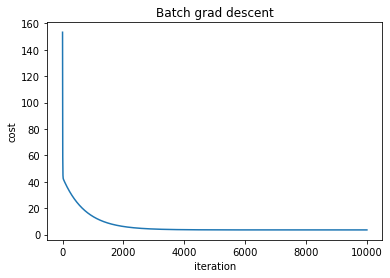

In [44]:
plt.plot(iteration_no,cost_list)
plt.xlabel('iteration')
plt.ylabel('cost')

plt.title('Batch grad descent')
plt.show()

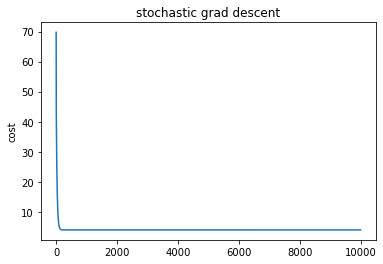

In [45]:
plt.plot(iteration_no,np.squeeze(cost_list_stochastic))
plt.ylabel('cost')

plt.title('stochastic grad descent')
plt.show()

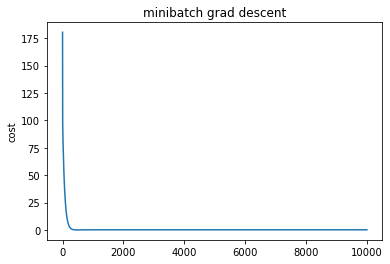

In [46]:
plt.plot(iteration_no,cost_list_minibatch)
plt.ylabel('cost')

plt.title('minibatch grad descent')
plt.show()